# Immunogenicity analysis

We uses the method of removing and/or reducing potential T-cell epitopes, as an approach to the management of the immunogenicity of biologics. The protein sequence is scanned in silico, for sequences that have a strong binding signature for a family of 50 MHC Class II receptors , whose alleles cover 96 – 98% of the human population. The presented histograms for each variable region sequence, show the average (for the n positively-testing MHC II alleles) of epitope strength at each position as a percentage for all epitopes above a threshold of 20%. At each position in the sequence, the number of alleles scoring above the threshold is shown above the histogram at that position. The epitopes of most concern for the antibody’s immunogenicity are therefore those that have not just the highest average score per allele (as shown by the histogram), but which also score above the threshold across more alleles, since these epitopes are more likely to engender an immune response in a larger fraction of the patient population.

Experience using in silico algorithms of this kind in conjunction with laboratory immunogenicity assays has shown that epitopes below this threshold do not generally contribute significantly to the protein’s immunogenicity. The number of alleles, the affected alleles and their individual scores are also listed in the detailed analyses below each histogram figure.

The raw immunogenicity score quoted is the total over all epitopes above the threshold for all affected alleles. The normalized immunogenicity score is this raw score divided by the sequence length, and represents epitope strength per unit sequence to enable comparisons of protein sequences of different lengths.

The absolute magnitudes of these scores are somewhat arbitrary, but they have value as comparative metrics. It has been shown that human serum proteins generally display an immunogenicity potential that is inversely proportional to their abundance in serum . Proteins that are found at very low concentrations in serum, like erythropoietin, can have normalized scores above 80%. By contrast, very abundant human serum proteins like albumin and immunoglobulins typically have normalized scores in the 35 - 50% range.


In [1]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' 
from Bio import SeqIO
# import epitopepredict as ep
# from epitopepredict import base, sequtils, analysis, plotting
import pandas as pd
from importlib import reload
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

#get list of predictors
# print(base.predictors)
# p = base.get_predictor('tepitope')
#get sequences from fasta file
record = SeqIO.read("../data/sequence.fasta", "fasta")
my_seq = str(record.seq)
target_name = record.name
# df = pd.DataFrame(my_seq,columns=['peptide'])

#get preset alleles
# m2_alleles = ep.get_preset_alleles('mhc2_supertypes')
# m1_alleles = ep.get_preset_alleles('mhc1_supertypes')

# #predict 
# length = 9
# p1 = base.get_predictor('basicmhc1')
# b1 = p1.predict_sequences(my_seq, alleles=m1_alleles, length=length, threads=32)
# # p1.get_binders(cutoff=.95)
# pivot_df = pd.pivot_table(b1, index='pos', values='score', columns='allele')
# # position to sequence
# # x_tick = my_seq[:len(my_seq)- length + 1]
# x_tick = my_seq[:pivot_df.shape[0]]
# pivot_df.index = list(x_tick)

## MHC class 1

Class I major histocompatibility complex (MHC) molecules bind, and present to T cells, short peptides derived from intracellular processing of proteins. The peptide repertoire of a specific molecule is to a large extent determined by the molecular structure accommodating so-called main anchor positions of the presented peptide.

MHC class I molecules are one of two primary classes of major histocompatibility complex (MHC) molecules (the other being MHC class II) and are found on the cell surface of all nucleated cells in the bodies of vertebrates.

Their function is to display peptide fragments of proteins from within the cell to cytotoxic T cells; this will trigger an immediate response from the immune system against a particular non-self antigen displayed with the help of an MHC class I protein. Because MHC class I molecules present peptides derived from cytosolic proteins, the pathway of MHC class I presentation is often called cytosolic or endogenous pathway.[^footnote1]

[^footnote1]: Kimball's Biology Pages, Histocompatibility Molecules

In humans, the HLAs corresponding to MHC class I are HLA-A, HLA-B, and HLA-C. Almost a decade ago we introduced this concept of clustering human leukocyte antigen (HLA) alleles and defined nine different groups, denominated as supertypes, on the basis of their main anchor specificity.

- HLA-A01:01
- HLA-A02:01
- HLA-A03:01
- HLA-A24:02
- HLA-B07:02
- HLA-B40:01 

In [2]:
# !netMHCpan -a HLA-A01:01,HLA-A02:01,HLA-A03:01,HLA-A24:02,HLA-B07:02,HLA-B40:01  -f ./data/sequence.fasta > ./data/MHC1.txt

def mhc1_result(temp):
        """Read raw results from netMHCpan output"""

        cols = ['pos','allele','peptide', 'Core', 'Of', 'Gp','Gl','Ip','Il','Icore',
                'Identity','Score_EL','Rank', "<=", 'Bindlevel']
        ignore = ['Pos','#','Protein','', 'training']
        res = pd.read_csv(temp, comment='#', names=cols, sep='\s+',
                          error_bad_lines=False, skiprows=47).dropna(subset=['peptide'])
        res = res[~res.pos.isin(ignore)]
        res = res[~res.Of.isin(ignore)]
        res = res.drop(columns='<=')
        res = res.astype({"Of":int, "Gp":int, "Gl": int, "Ip":int, "Il": int, 
                          "Score_EL": float, "Rank": float})
        return res
    
df = mhc1_result('../data/MHC1.txt')
# df.head()

b'Skipping line 2119: expected 15 fields, saw 18\nSkipping line 4198: expected 15 fields, saw 18\nSkipping line 6277: expected 15 fields, saw 18\nSkipping line 8356: expected 15 fields, saw 18\nSkipping line 10435: expected 15 fields, saw 18\nSkipping line 12514: expected 15 fields, saw 18\n'


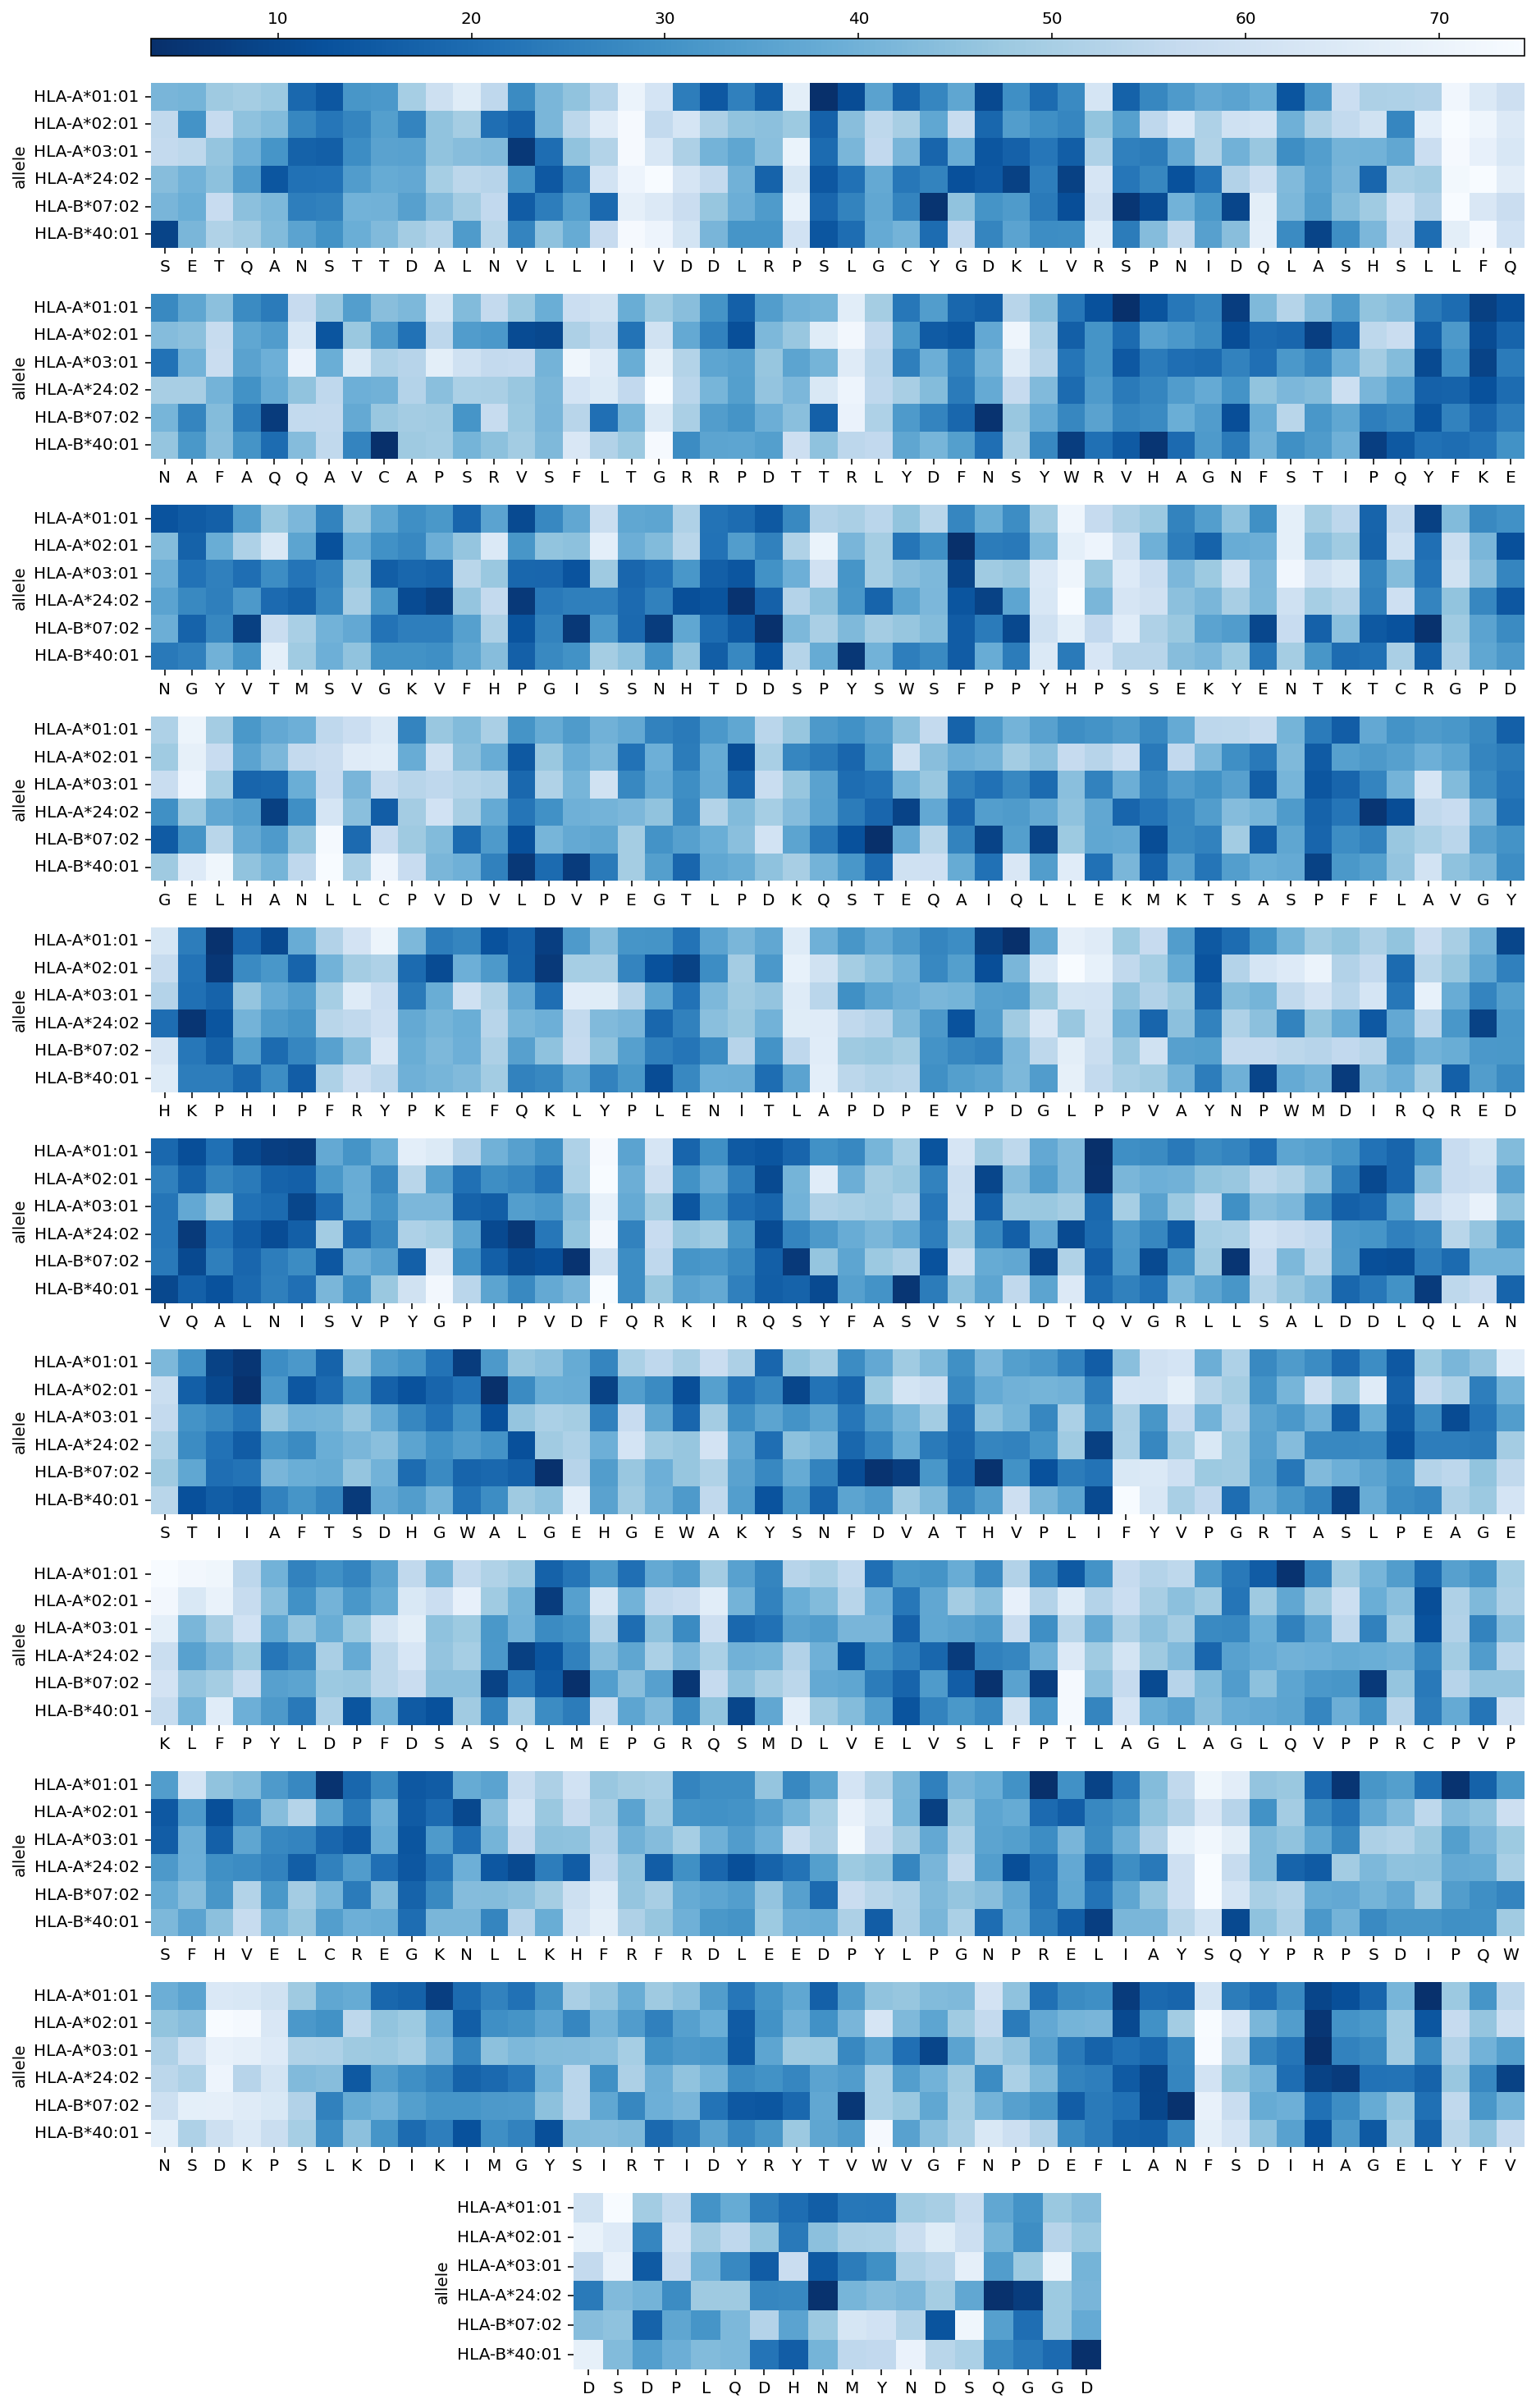

In [3]:
import math
import seaborn as sns 

chunks_size = 50
chunks_num = math.ceil(len(my_seq)/chunks_size)

def split_dataframe(df, chunk_size = 10000): 
    num_chunks = len(df) // chunk_size
    if len(df) % chunk_size != 0:
        num_chunks += 1
    for i in range(num_chunks):
        yield df[i*chunk_size:(i + 1) * chunk_size]

df_pivot = pd.pivot_table(df, index='pos', values='Rank', columns='allele')
x_tick = my_seq[:df_pivot.shape[0]]
df_pivot.index = list(x_tick)

df_list = split_dataframe(df_pivot,chunks_size)

f,axs = plt.subplots(chunks_num, 1, figsize=(15, 3+2.5*chunks_num))
nrows = chunks_num
ncols = 1

for n, data in enumerate(df_list):
    ax = plt.subplot(nrows, ncols, n+1)
    sns.heatmap(data.T,cmap='Blues_r',square=True, cbar=False, ax=ax)

mappable=ax.get_children()[0]    
plt.colorbar(mappable, ax=axs, location='top', pad=0.01, orientation='horizontal', aspect=80)
plt.show()

### MHC class1 binding peptide

#### Top10 strong binding peptide

In [4]:
# df_binder = df[~df['Bindlevel']. isna()]
# strong binder
df_binder = df[df['Bindlevel'] == 'SB']
df_binder = df_binder[['allele','peptide','Core','Rank']].sort_values(by=['Rank'], ascending=True).reset_index(drop=True)
df_binder.head(10)

,allele,peptide,Core,Rank
0,HLA-A*01:01,FSDIHAGELY,FSDHAGELY,0.004
1,HLA-A*24:02,RYPKEFQKL,RYPKEFQKL,0.006
2,HLA-A*24:02,PYGPIPVDF,PYGPIPVDF,0.011
3,HLA-A*01:01,DSDPLQDHNMY,DSDPLQNMY,0.026
4,HLA-A*24:02,NFSTIPQYF,NFSTIPQYF,0.035
5,HLA-A*24:02,VPYGPIPVDF,VYGPIPVDF,0.044
6,HLA-A*02:01,SLFPTLAGL,SLFPTLAGL,0.059
7,HLA-A*02:01,KLYPLENITL,KLYPENITL,0.064
8,HLA-B*40:01,KEFQKLYPL,KEFQKLYPL,0.065
9,HLA-A*02:01,YLDPFDSASQL,YLFDSASQL,0.067


#### Frequency of binding peptide

Pie graphs are drawn to visualize peptides with immunogenicity in various alleles.

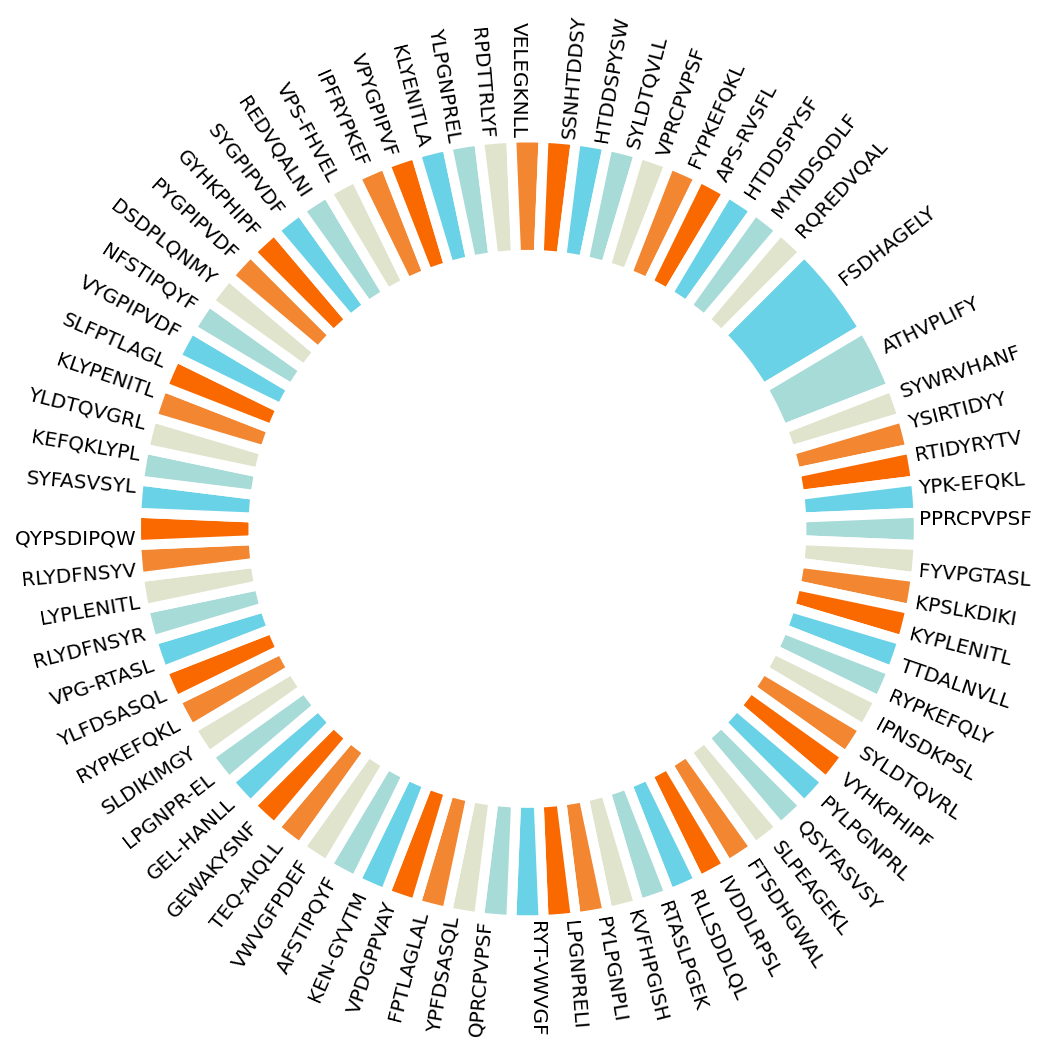

In [5]:
item_counts = df_binder["Core"].value_counts(normalize=True)
allele_counts = df_binder["allele"].value_counts(normalize=True)

plt.figure(figsize=(9,9))

data = item_counts
# names = list(data.keys())
# values = list(data.values())
colors = ['#69D2E7', '#A7DBD8', '#E0E4CC', '#F38630', '#FA6900'] #goldfish
# colors = ['#ECD078', '#D95B43', '#C02942', '#542437', '#53777A'] #Thought Provoking
wedgeprops={'width': 0.3, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(data, labels=data.index, startangle=45,labeldistance=1., rotatelabels=True,
        counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

# import numpy as np
# fig, ax = plt.subplots(figsize=(12,12))

# size = 0.3
# vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

# cmap = plt.get_cmap("tab20c")
# outer_colors = cmap(np.arange(3)*4)
# inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

# ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
#        wedgeprops=dict(width=size, edgecolor='w'))

# ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
#        wedgeprops=dict(width=size, edgecolor='w'))

# ax.set(aspect="equal", title='Pie plot with `ax.pie`')
# plt.show()

## MHC class 2


In [6]:
# !netMHCIIpan -a DRB1_0101,DRB1_0102,DRB1_0103,DRB1_0104,DRB1_0105,DRB1_0106,DRB1_0107,DRB1_0108,DRB1_0109,DRB1_0110  -f ./data/sequence.fasta > ./data/MHC2.txt

def mhc2_result(temp):
        """Read raw results from netMHCIIpan output"""

        ignore = ['Pos','#','Protein','','Number']
        cols = ['pos','allele','peptide', 'Of', 'Core', 'Core_rel', 'Identity','Affinity','Rank','Exp_Bind', 'Bindlevel']
        res = pd.read_csv(temp, comment='#', names=cols, sep='\s+',
                          error_bad_lines=False, skiprows=15).dropna(subset=['peptide'])
        res = res[~res.pos.isin(ignore)]
        res = res.astype({"Of":int, "Core_rel":float, "Affinity": float, "Rank": float})
        return res

df = mhc2_result('../data/MHC2.txt')
# df.head()

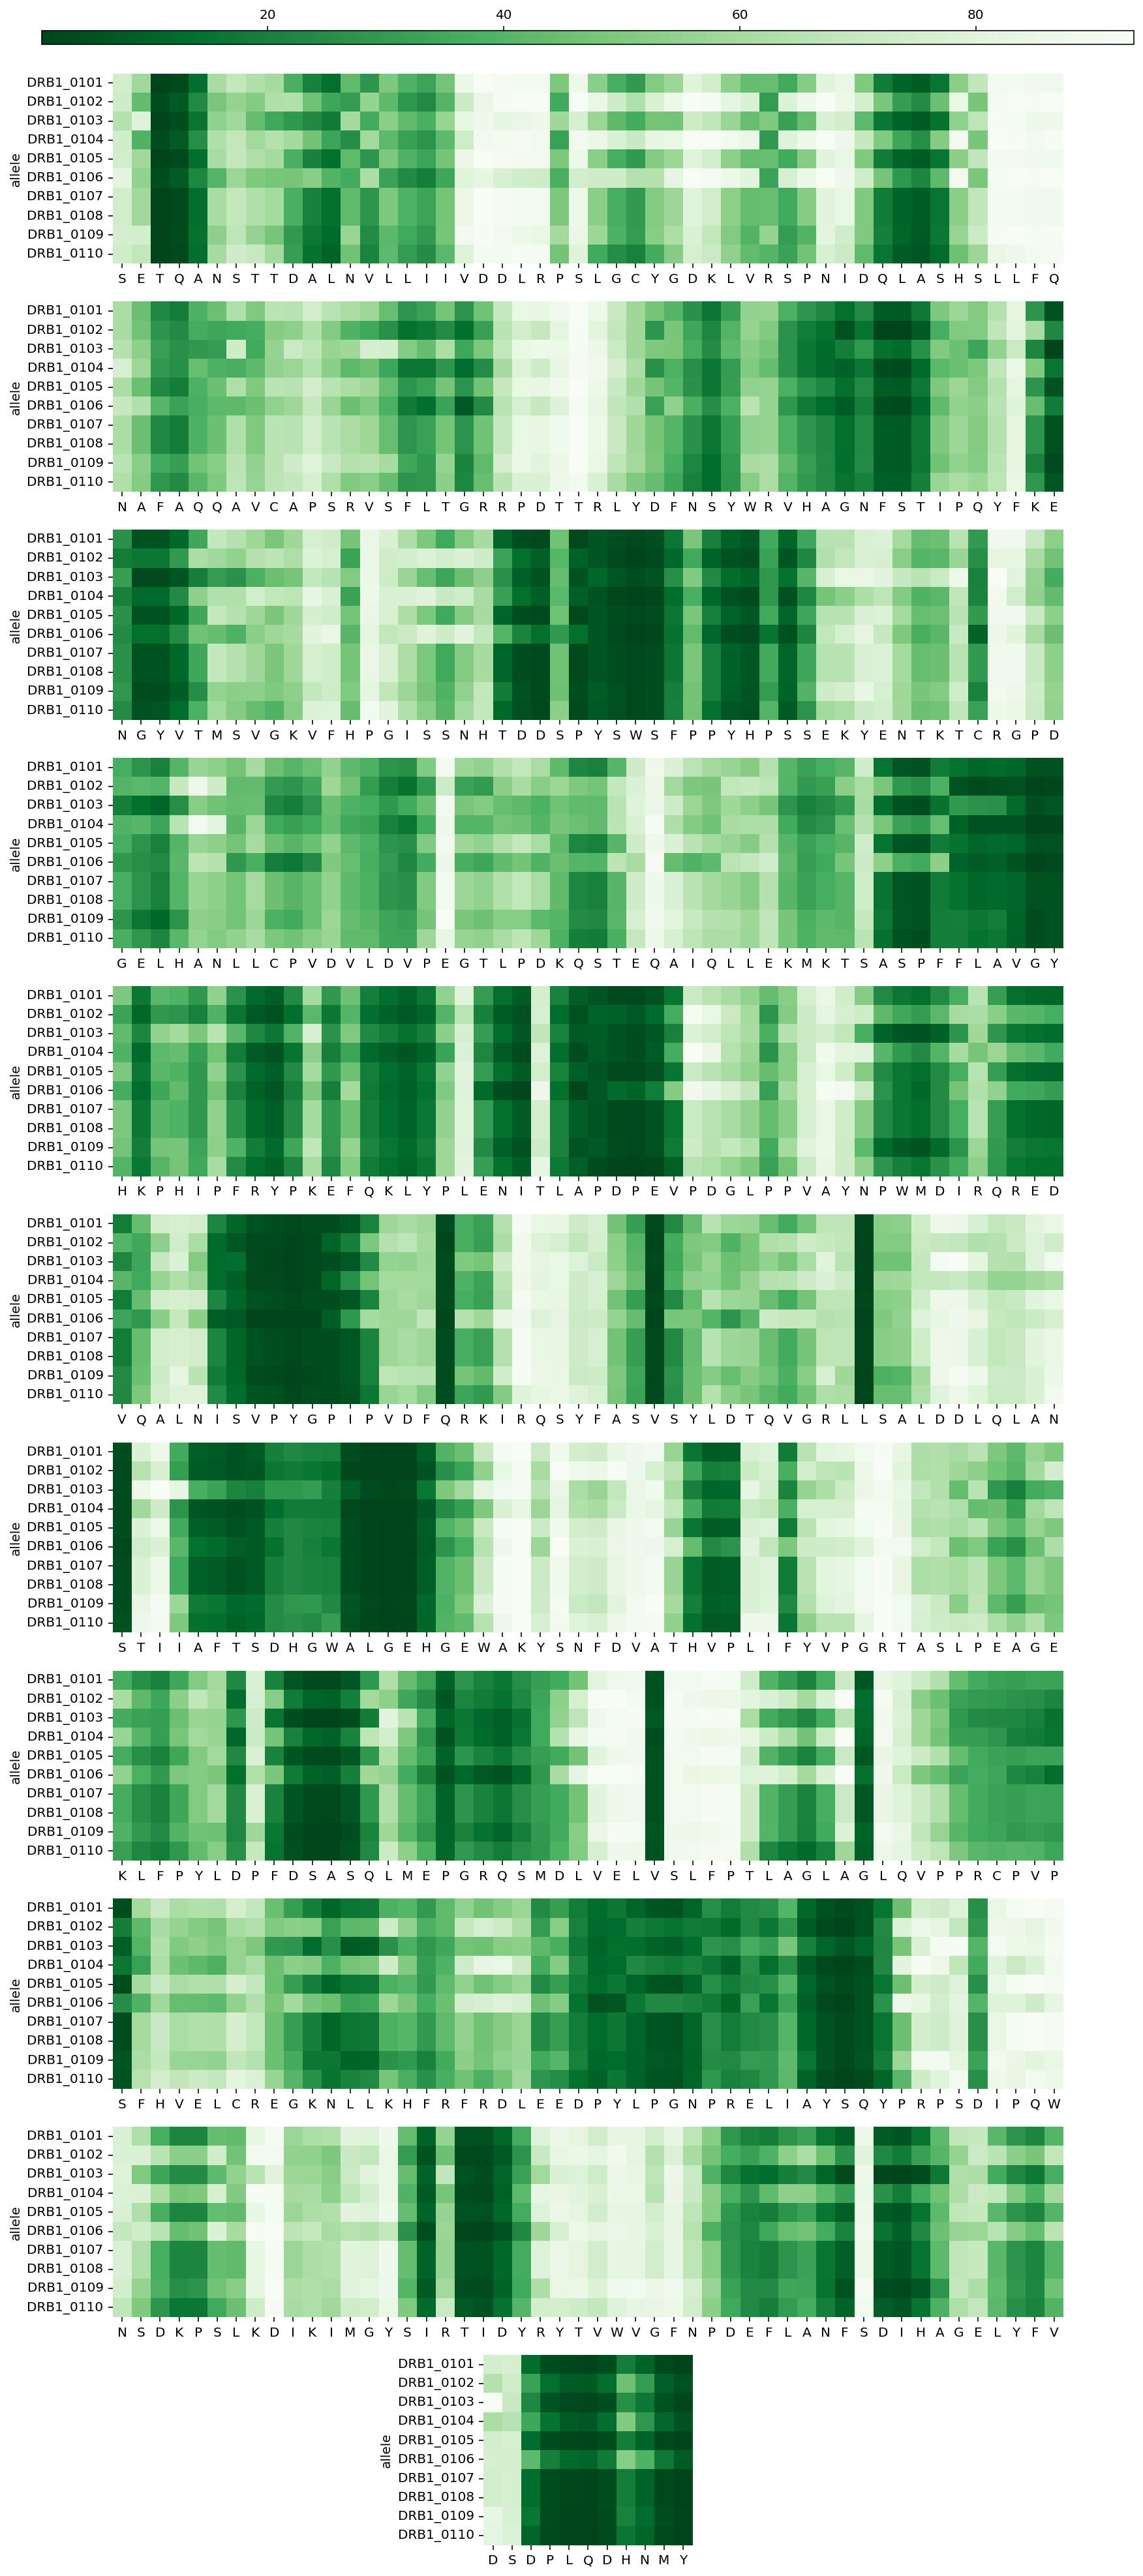

In [7]:
df_pivot = pd.pivot_table(df, index='pos', values='Rank', columns='allele')
x_tick = my_seq[:df_pivot.shape[0]]
df_pivot.index = list(x_tick)
# strong binder
df_binder = df[df['Bindlevel']=='SB']

df_list = split_dataframe(df_pivot,chunks_size)

f,axs = plt.subplots(chunks_num, 1, figsize=(15, 3+3.5*chunks_num)) # size modified to fit
nrows = chunks_num
ncols = 1

for n, data in enumerate(df_list):
    ax = plt.subplot(nrows, ncols, n+1)
    sns.heatmap(data.T,cmap='Greens_r',square=True, cbar=False, ax=ax)

mappable=ax.get_children()[0]    
plt.colorbar(mappable, ax=axs, location='top', pad=0.01, orientation='horizontal', aspect=80)
# plt.tight_layout()
plt.show()

### MHC class 2 binder peptide

#### Top10 peptide

In [8]:
df_binder = df[~df['Bindlevel']. isna()]
df_binder = df_binder[['allele','peptide','Core','Rank']].sort_values(by=['Rank'], ascending=True).reset_index(drop=True)
df_binder.head(10)


,allele,peptide,Core,Rank
0,DRB1_0102,FPTLAGLAGLQVPPR,LAGLAGLQV,0.07
1,DRB1_0104,FPTLAGLAGLQVPPR,LAGLAGLQV,0.08
2,DRB1_0106,FPTLAGLAGLQVPPR,LAGLAGLQV,0.14
3,DRB1_0102,PTLAGLAGLQVPPRC,LAGLAGLQV,0.18
4,DRB1_0106,VPLIFYVPGRTASLP,IFYVPGRTA,0.22
5,DRB1_0102,LFPTLAGLAGLQVPP,LAGLAGLQV,0.23
6,DRB1_0104,PTLAGLAGLQVPPRC,LAGLAGLQV,0.26
7,DRB1_0101,FPTLAGLAGLQVPPR,LAGLAGLQV,0.28
8,DRB1_0107,FPTLAGLAGLQVPPR,LAGLAGLQV,0.28
9,DRB1_0108,FPTLAGLAGLQVPPR,LAGLAGLQV,0.28


#### Frequency of binding peptide

Pie graphs are drawn to visualize peptides with immunogenicity in various alleles.

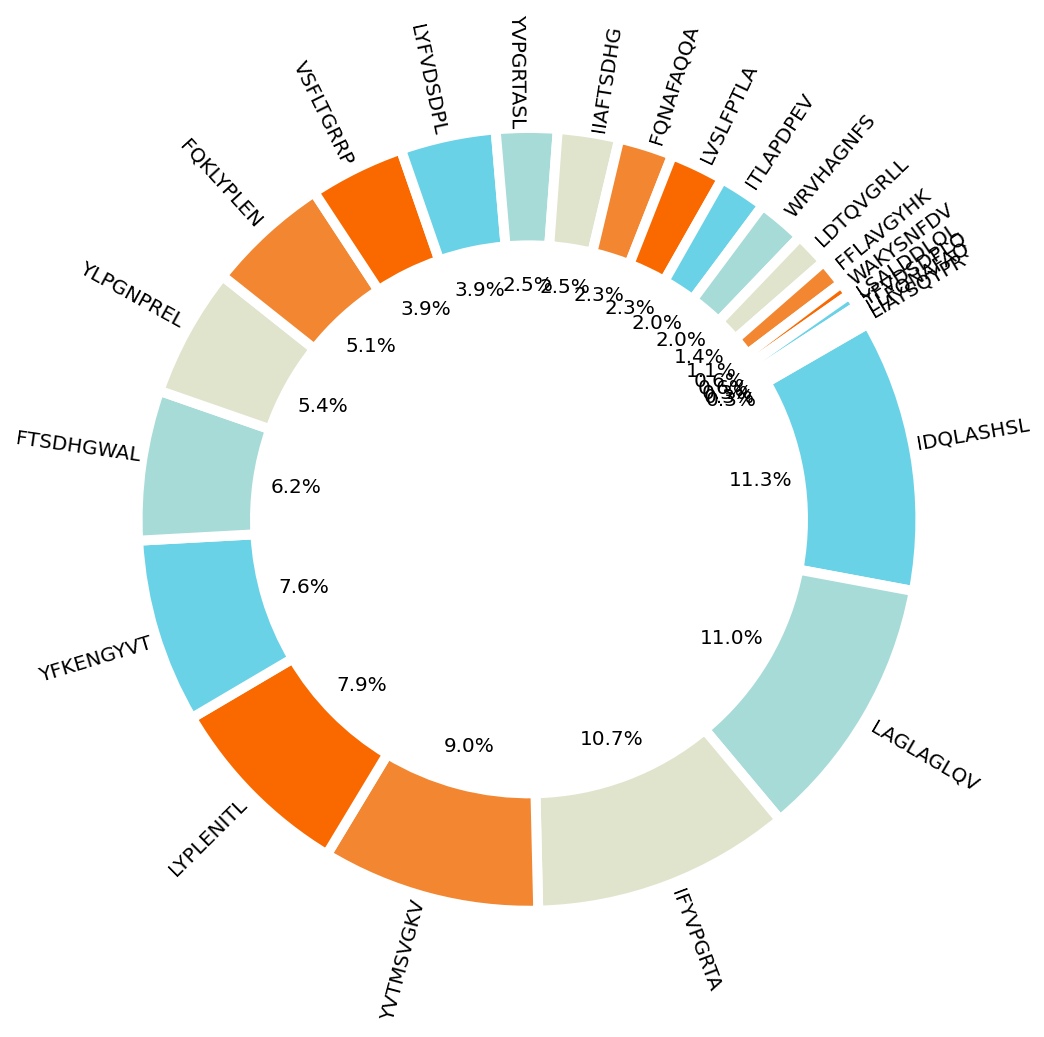

In [9]:
item_counts = df_binder["Core"].value_counts(normalize=True)
allele_counts = df_binder["allele"].value_counts(normalize=True)

plt.figure(figsize=(9,9))

data = item_counts
# names = list(data.keys())
# values = list(data.values())
colors = ['#69D2E7', '#A7DBD8', '#E0E4CC', '#F38630', '#FA6900'] #goldfish
# colors = ['#ECD078', '#D95B43', '#C02942', '#542437', '#53777A'] #Thought Provoking
wedgeprops={'width': 0.3, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(data, labels=data.index, autopct='%.1f%%', startangle=30,labeldistance=1., rotatelabels=True,
        counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

# Appendix

In [10]:
# import biotite.sequence as seq
# import biotite.sequence.align as align
# import numpy as np

# alph = seq.ProteinSequence.alphabet
# # Load the standard protein substitution matrix, which is BLOSUM62
# matrix = align.SubstitutionMatrix.std_protein_matrix()
# print("\nBLOSUM62\n")
# print(matrix)
# # Load another matrix from internal database
# matrix = align.SubstitutionMatrix(alph, alph, "BLOSUM50")
# # Load a matrix dictionary representation,
# # modify it, and create the SubstitutionMatrix
# # (The dictionary could be alternatively loaded from a string containing
# # the matrix in NCBI format)
# matrix_dict = align.SubstitutionMatrix.dict_from_db("BLOSUM62")
# matrix_dict[("P","Y")] = 100
# matrix = align.SubstitutionMatrix(alph, alph, matrix_dict)
# # And now create a matrix by directly provding the ndarray
# # containing the similarity scores
# # (identity matrix in our case)
# scores = np.identity(len(alph), dtype=int)
# matrix = align.SubstitutionMatrix(alph, alph, scores)
# print("\n\nIdentity matrix\n")
# print(matrix)

In [11]:
# seq1 = seq.ProteinSequence("BIQTITE")
# seq2 = seq.ProteinSequence("IQLITE")
# matrix = align.SubstitutionMatrix.std_protein_matrix()
# print("\nLocal alignment")
# alignments = align.align_optimal(seq1, seq2, matrix, local=True)
# for ali in alignments:
#     print(ali)
# print("Global alignment")
# alignments = align.align_optimal(seq1, seq2, matrix, local=False)
# for ali in alignments:
#     print(ali)

In [12]:
# import matplotlib.pyplot as plt
# import biotite.sequence.graphics as graphics

# fig, ax = plt.subplots(figsize=(2.0, 0.8))
# graphics.plot_alignment_similarity_based(
#     ax, alignments[0], matrix=matrix, symbols_per_line=len(alignments[0])
# )
# fig.tight_layout()

In [13]:
# import matplotlib.pyplot as plt
# import biotite.sequence as seq
# import biotite.sequence.align as align
# import biotite.sequence.io.fasta as fasta
# import biotite.database.entrez as entrez
# import biotite.sequence.graphics as graphics

# # Download and parse protein sequences of avidin and streptavidin
# fasta_file = fasta.FastaFile.read(entrez.fetch_single_file(
#     ["CAC34569", "ACL82594"], None, "protein", "fasta"
# ))
# for name, sequence in fasta_file.items():
#     if "CAC34569" in name:
#         avidin_seq = seq.ProteinSequence(sequence)
#     elif "ACL82594" in name:
#         streptavidin_seq = seq.ProteinSequence(sequence)

# # Get BLOSUM62 matrix
# matrix = align.SubstitutionMatrix.std_protein_matrix()
# # Perform pairwise sequence alignment with affine gap penalty
# # Terminal gaps are not penalized
# alignments = align.align_optimal(avidin_seq, streptavidin_seq, matrix,
#                                  gap_penalty=(-10, -1), terminal_penalty=False)

# # Draw first and only alignment
# # The color intensity indicates the similiarity
# fig = plt.figure(figsize=(8.0, 2.5))
# ax = fig.add_subplot(111)
# graphics.plot_alignment_similarity_based(
#     ax, alignments[0], matrix=matrix, labels=["Avidin", "Streptavidin"],
#     show_numbers=True, show_line_position=True
# )
# fig.tight_layout()

# plt.show()